In [ ]:
!pip install pygmo

In [ ]:
# Load standard modules
import math
import pygmo
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick
import matplotlib.animation as animation
import numpy as np
from numpy import random

# Load pygmo library
import pygmo as pg

In [ ]:
def animation(positions, function, lb, ub, name, sr = False):
  agents = positions
  if len(agents) - 1 != 0:
    side = np.linspace(lb, ub, int(ub - lb) * 5)
    X, Y = np.meshgrid(side, side)
    Z = np.array([np.array([function([X[i][j], Y[i][j]]) for j in range(len(X))]) for i in range(len(X[0]))]).squeeze()

    fig = plt.figure()
    plt.axes(xlim=(lb, ub), ylim=(lb, ub))
    plt.pcolormesh(X, Y, Z, shading='gouraud')
    plt.colorbar()

    x = np.array([j[0] for j in agents[0]])
    y = np.array([j[1] for j in agents[0]])
    sc = plt.scatter(x, y, color='black')

    plt.title(f"{name}", loc='left')

    def an(i):
      x = np.array([j[0] for j in agents[i]])
      y = np.array([j[1] for j in agents[i]])
      sc.set_offsets(list(zip(x, y)))
      plt.title('iteration: {}'.format(i), loc='right')

    ani = matplotlib.animation.FuncAnimation(fig, an, frames=len(agents) - 1)

    if sr:
      ani.save(name)
    plt.show()

In [ ]:
def show1(udp, individuals_list, fitness_list, name):
  # Extract best individuals for each generation
  best_x = [ind[0] for ind in individuals_list]
  best_y = [ind[1] for ind in individuals_list]

  # Extract problem bounds
  (x_min, y_min), (x_max, y_max) = udp.get_bounds()

  # Plot fitness over generations
  fig, ax = plt.subplots(figsize=(9, 5))

  # Plot champion
  champion_n = np.argmin(np.array(fitness_list))
  new_fitness_list = fitness_list[:champion_n]

  print('The value will not change after index ', champion_n)
  ax.plot(np.arange(0, champion_n), new_fitness_list, label='Function value')
  ax.scatter(champion_n, np.min(fitness_list), marker='x', color='r', label='All-time champion')
  print(individuals_list)
  # Prettify
  ax.set_xlim((0, number_of_evolutions))
  ax.grid('major')
  ax.set_title('Best individual of each generation', fontweight='bold')
  ax.set_xlabel('Number of generation')
  ax.set_ylabel(name + r' function value $f(x,y)$')
  ax.legend(loc='upper right')

  plt.tight_layout()

  # Show the figure
  plt.show()

  return best_x, best_y, x_min, y_min, x_max, y_max

In [ ]:
def show2(udp, name, best_x, best_y, x_min, y_min, x_max, y_max):
  # Plot function
  grid_points = 100
  x_vector = np.linspace(x_min, x_max, grid_points)
  y_vector = np.linspace(y_min, y_max, grid_points)
  x_grid, y_grid = np.meshgrid(x_vector, y_vector)
  z_grid = np.zeros((grid_points, grid_points))
  for i in range(x_grid.shape[1]):
      for j in range(x_grid.shape[0]):
          z_grid[i, j] = udp.fitness([x_grid[i, j], y_grid[i, j]])[0]

  # Create figure
  fig, ax = plt.subplots(figsize=(9,5))
  cs = ax.contour(x_grid, y_grid, z_grid, 50)

  # Plot best individuals of each generation
  ax.scatter(best_x, best_y, marker='x', color='r',zorder=10)

  # Prettify
  ax.set_xlim((x_min, x_max))
  ax.set_ylim((y_min, y_max))
  ax.set_title(f'{name} function', fontweight='bold')
  ax.set_xlabel('X-coordinate')
  ax.set_ylabel('Y-coordinate')
  cbar = fig.colorbar(cs)
  cbar.ax.set_ylabel(name + r' function value $f(x,y)$')
  plt.tight_layout()

  (x_min, y_min), (x_max, y_max) = udp.get_bounds()

  # Show the plot
  plt.show()

In [ ]:
# Set population size
pop_size = 1000
# Set number of evolutions
number_of_evolutions = 100
# Define number of generations
number_of_generations = 1
# Fix seed
current_seed = 171015
# Create Differential Evolution object by passing the number of generations as input
de_algo = pygmo.de(gen=number_of_generations, seed=current_seed)
# Create pygmo algorithm object
algo = pygmo.algorithm(de_algo)
# Print the algorithm's information
print(algo)

Algorithm name: DE: Differential Evolution [stochastic]
	C++ class name: pagmo::de

	Thread safety: basic

Extra info:
	Generations: 1
	Parameter F: 0.800000
	Parameter CR: 0.900000
	Variant: 2
	Stopping xtol: 0.000001
	Stopping ftol: 0.000001
	Verbosity: 0
	Seed: 171015


In [ ]:
class Optimization:
  def __init__(self, x_min: float, x_max: float, y_min: float, y_max: float):
    # Set input arguments as attributes, representing the problem bounds for both design variables
    self.x_min = x_min
    self.x_max = x_max
    self.y_min = y_min
    self.y_max = y_max

  def get_bounds(self):
    return ([self.x_min, self.y_min], [self.x_max, self.y_max])

Problem name: <class '__main__.HimmelblauOptimization'>
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-5, -5]
	Upper bounds: [5, 5]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none


########### PRINTING CHAMPION INDIVIDUALS ###########

Fitness (= function) value:  [2.78902482e-09]
Decision variable vector:  [ 3.58443564 -1.84812661]
Number of function evaluations:  101000
The value will not change after index  95
[array([3.00790726, 2.06897149]), array([-2.83832328,  3.12208465]), array([-2.83832328,  3.12208465]), array([-2.83832328,  3.12208465]), array([-2.83832328,  3.12208465]), array([2.98746483, 2.00172946]), array([2.98746483, 2.00172946]), a

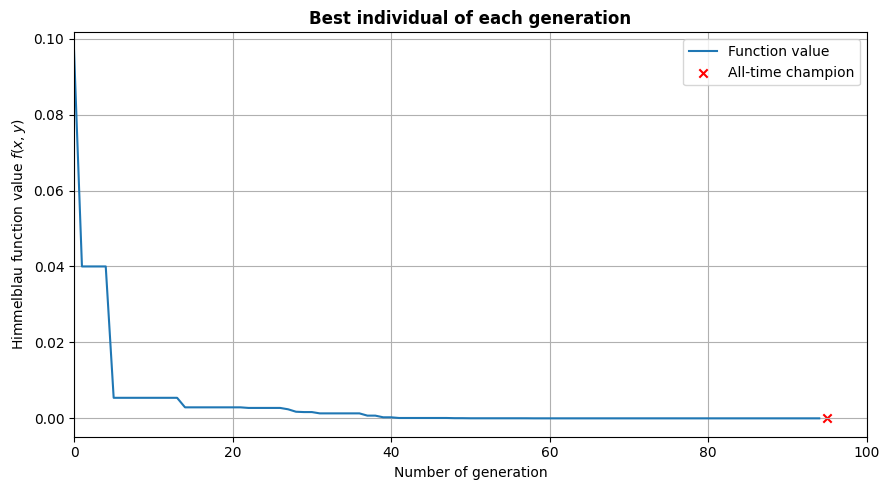

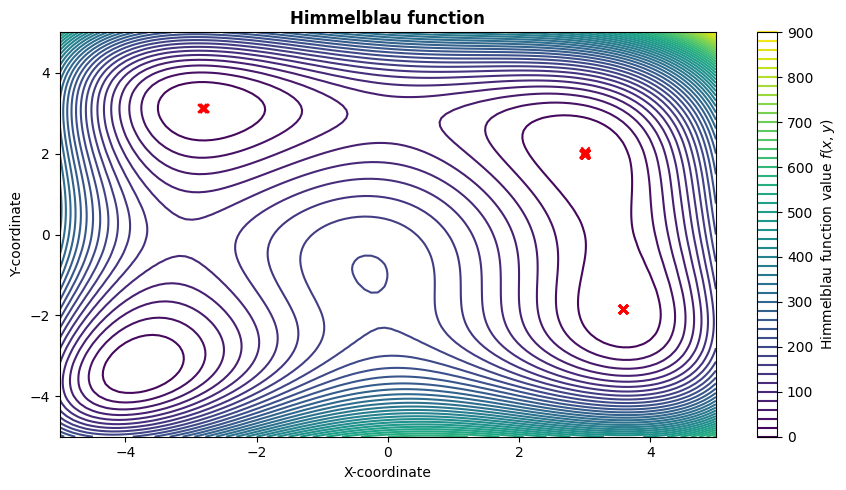

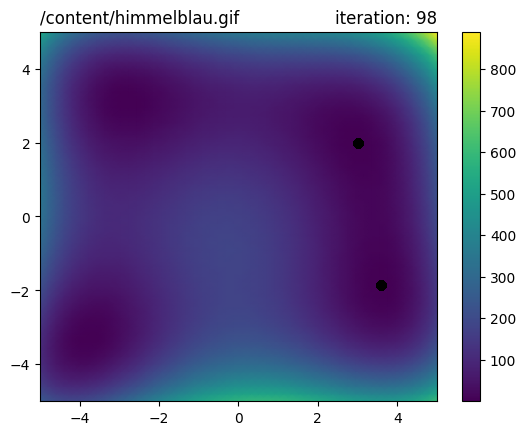

In [ ]:
class HimmelblauOptimization(Optimization):
  def __init__(self, x_min: float, x_max: float, y_min: float, y_max: float):
    # Set input arguments as attributes, representing the problem bounds for both design variables
    super().__init__(x_min, x_max, y_min, y_max)
  # Библиотека тербует, чтобы в классе проблемы была функция с названием fitness
  def fitness(self, x):
    # Compute Himmelblau function value
    function_value = (x[0] ** 2 + x[1] - 11.0) ** 2 + (x[0] + x[1] ** 2 - 7.0) ** 2

    # Return list
    return [function_value]

# Instantiation of the UDP problem
udp_himmelblau = HimmelblauOptimization(-5.0, 5.0, -5.0, 5.0)
# Creation of the pygmo problem object
prob_himmelblau = pygmo.problem(udp_himmelblau)
# Print the problem's information
print(prob_himmelblau)

# Create population
pop_himmelblau = pygmo.population(prob_himmelblau, size=pop_size, seed=current_seed)
# Inspect population (this is going to be long, uncomment if desired)
# inspect_pop = False
# if inspect_pop:
#   print(pop)

# Initialize empty containers
individuals_list_himmelblau = []
fitness_list_himmelblau = []
all_points_himmelblau = []

# Evolve population multiple times
for i in range(number_of_evolutions):
  pop_himmelblau = algo.evolve(pop_himmelblau)
  all_points_himmelblau.append(pop_himmelblau.get_x())
  individuals_list_himmelblau.append(pop_himmelblau.get_x()[pop_himmelblau.best_idx()])
  fitness_list_himmelblau.append(pop_himmelblau.get_f()[pop_himmelblau.best_idx()])

# Extract the best individual
print('\n########### PRINTING CHAMPION INDIVIDUALS ###########\n')
print('Fitness (= function) value: ', pop_himmelblau.champion_f)
print('Decision variable vector: ', pop_himmelblau.champion_x)
print('Number of function evaluations: ', pop_himmelblau.problem.get_fevals())

best_x, best_y, x_min, y_min, x_max, y_max = show1(udp_himmelblau, individuals_list_himmelblau, fitness_list_himmelblau, 'Himmelblau')

show2(udp_himmelblau, 'Himmelblau', best_x, best_y, x_min, y_min, x_max, y_max)

animation(all_points_himmelblau, udp_himmelblau.fitness, -5, 5, f'/content/himmelblau.gif', True)

Problem name: <class '__main__.EggHolderOptimization'>
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-512, -512]
	Upper bounds: [512, 512]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none


########### PRINTING CHAMPION INDIVIDUALS ###########

Fitness (= function) value:  [-959.63454349]
Decision variable vector:  [511.99894359 404.27814288]
Number of function evaluations:  101000
The value will not change after index  95
[array([463.57677321, 413.50812601]), array([463.57677321, 413.50812601]), array([463.57677321, 413.50812601]), array([425.92083752, 442.73591051]), array([425.92083752, 442.73591051]), array([435.90337138, 448.25642305]), array([435

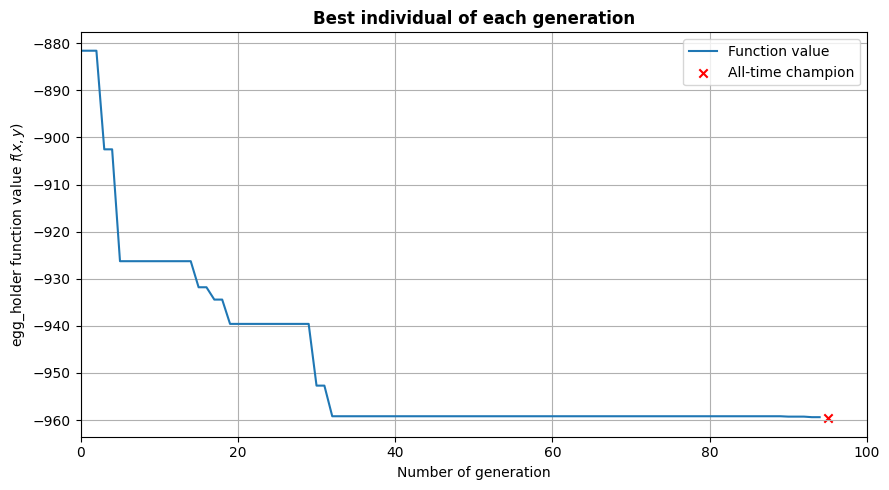

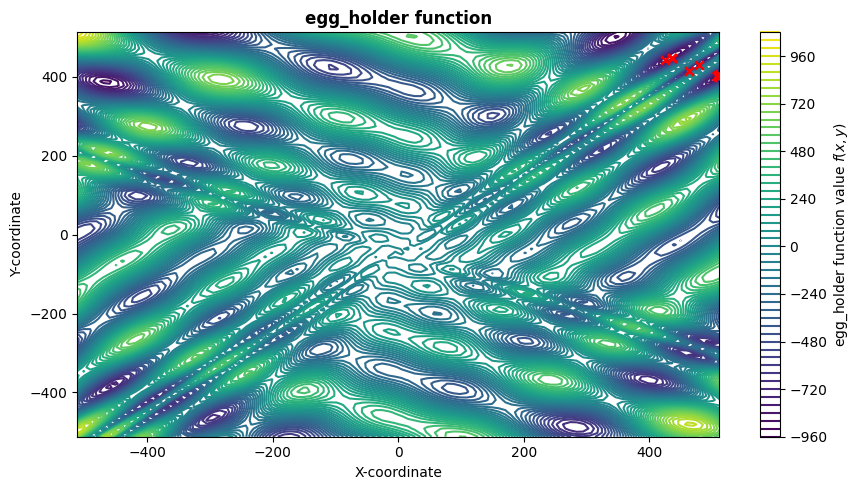

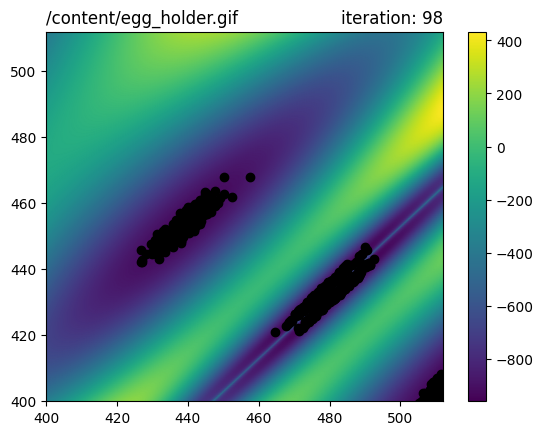

In [ ]:
class EggHolderOptimization(Optimization):
  def __init__(self, x_min: float, x_max: float, y_min: float, y_max: float):
    # Set input arguments as attributes, representing the problem bounds for both design variables
    super().__init__(x_min, x_max, y_min, y_max)
 # Библиотека тербует, чтобы в классе проблемы была функция с названием fitness
  def fitness(self, x):
    # Compute EggHolderOptimization function value
    function_value = -(x[1] + 47) * np.sin(np.sqrt(abs(x[1] + x[0] / 2 + 47))) - x[0] * np.sin(np.sqrt(abs(x[0] - (x[1] + 47))))

    # Return list
    return [function_value]

# Instantiation of the UDP problem
udp_egg_holder = EggHolderOptimization(-512.0, 512.0, -512.0, 512.0)
# Creation of the pygmo problem object
prob_egg_holder = pygmo.problem(udp_egg_holder)
# Print the problem's information
print(prob_egg_holder)

# Create population
pop_egg_holder = pygmo.population(prob_egg_holder, size=pop_size, seed=current_seed)

# Initialize empty containers
individuals_list_egg_holder = []
fitness_list_egg_holder = []
all_points_egg_holder = []

# Evolve population multiple times
for i in range(number_of_evolutions):
    pop_egg_holder = algo.evolve(pop_egg_holder)
    all_points_egg_holder.append(pop_egg_holder.get_x())
    individuals_list_egg_holder.append(pop_egg_holder.get_x()[pop_egg_holder.best_idx()])
    fitness_list_egg_holder.append(pop_egg_holder.get_f()[pop_egg_holder.best_idx()])

# Extract the best individual
print('\n########### PRINTING CHAMPION INDIVIDUALS ###########\n')
print('Fitness (= function) value: ', pop_egg_holder.champion_f)
print('Decision variable vector: ', pop_egg_holder.champion_x)
print('Number of function evaluations: ', pop_egg_holder.problem.get_fevals())

best_x, best_y, x_min, y_min, x_max, y_max = show1(udp_egg_holder, individuals_list_egg_holder, fitness_list_egg_holder, 'egg_holder')

show2(udp_egg_holder, 'egg_holder', best_x, best_y, x_min, y_min, x_max, y_max)

animation(all_points_egg_holder, udp_egg_holder.fitness, 400, 512, f'/content/egg_holder.gif', True)

In [ ]:
class RastriginFunctionOptimization(Optimization):
  def __init__(self, x_min: float, x_max: float, y_min: float, y_max: float):
    # Set input arguments as attributes, representing the problem bounds for both design variables
    super().__init__(x_min, x_max, y_min, y_max)
 # Библиотека тербует, чтобы в классе проблемы была функция с названием fitness
  def fitness(self, x):
    # Compute RastriginFunctionOptimization function value
    n = len(x)
    function_value = 10 * n + sum([(xi ** 2 - 10 * np.cos(2 * np.pi * xi)) for xi in x])

    # Return list
    return [function_value]

# Instantiation of the UDP problem
udp_rastigrin = RastriginFunctionOptimization(-5.12, 5.12, -5.12, 5.12)
# Creation of the pygmo problem object
prob_rastigrin = pygmo.problem(udp_rastigrin)
# Print the problem's information
print(prob_rastigrin)

# Create population
pop_rastigrin = pygmo.population(prob_rastigrin, size=pop_size, seed=current_seed)

# Initialize empty containers
individuals_list_rastigrin = []
fitness_list_rastigrin = []
all_points_rastigrin = []

# Evolve population multiple times
for i in range(number_of_evolutions):
    pop_rastigrin = algo.evolve(pop_rastigrin)
    all_points_rastigrin.append(pop_rastigrin.get_x())
    individuals_list_rastigrin.append(pop_rastigrin.get_x()[pop_rastigrin.best_idx()])
    fitness_list_rastigrin.append(pop_rastigrin.get_f()[pop_rastigrin.best_idx()])

# Extract the best individual
print('\n########### PRINTING CHAMPION INDIVIDUALS ###########\n')
print('Fitness (= function) value: ', pop_rastigrin.champion_f)
print('Decision variable vector: ', pop_rastigrin.champion_x)
print('Number of function evaluations: ', pop_rastigrin.problem.get_fevals())

best_x, best_y, x_min, y_min, x_max, y_max = show1(udp_rastigrin, individuals_list_rastigrin, fitness_list_rastigrin, 'rastigrin')

show2(udp_rastigrin, 'rastigrin', best_x, best_y, x_min, y_min, x_max, y_max)

animation(all_points_rastigrin, udp_rastigrin.fitness, -5.12, 5.12, f'/content/rastigrin.gif', True)

In [ ]:
class RosenbrockOptimization(Optimization):
  def __init__(self, x_min: float, x_max: float, y_min: float, y_max: float):
    # Set input arguments as attributes, representing the problem bounds for both design variables
    super().__init__(x_min, x_max, y_min, y_max)
 # Библиотека тербует, чтобы в классе проблемы была функция с названием fitness
  def fitness(self, x):
    # Compute EggHolderOptimization function value
    n = 2
    sum_val = 0
    for i in range(n - 1):
      sum_val += 100 * (x[i + 1] - x[i] ** 2) ** 2 + (x[i] - 1) ** 2
    # Return list
    return [sum_val]

# Instantiation of the UDP problem
udp_rosenbrock = RosenbrockOptimization(-100.0, 100.0, -100.0, 100.0)
# Creation of the pygmo problem object
prob_rosenbrock = pygmo.problem(udp_rosenbrock)
# Print the problem's information
print(prob_rosenbrock)

# Create population
pop_rosenbrock = pygmo.population(prob_rosenbrock, size=pop_size, seed=current_seed)

# Initialize empty containers
individuals_list_rosenbrock = []
fitness_list_rosenbrock = []
all_points_rosenbrock = []

# Evolve population multiple times
for i in range(number_of_evolutions):
    pop_rosenbrock = algo.evolve(pop_rosenbrock)
    all_points_rosenbrock.append(pop_rosenbrock.get_x())
    individuals_list_rosenbrock.append(pop_rosenbrock.get_x()[pop_rosenbrock.best_idx()])
    fitness_list_rosenbrock.append(pop_rosenbrock.get_f()[pop_rosenbrock.best_idx()])

# Extract the best individual
print('\n########### PRINTING CHAMPION INDIVIDUALS ###########\n')
print('Fitness (= function) value: ', pop_rosenbrock.champion_f)
print('Decision variable vector: ', pop_rosenbrock.champion_x)
print('Number of function evaluations: ', pop_rosenbrock.problem.get_fevals())

best_x, best_y, x_min, y_min, x_max, y_max = show1(udp_rosenbrock, individuals_list_rosenbrock, fitness_list_rosenbrock, 'rosenbrock')

show2(udp_rosenbrock, 'rosenbrock', best_x, best_y, x_min, y_min, x_max, y_max)

animation(all_points_rosenbrock, udp_rosenbrock.fitness, -20.0, 20.0, f'/content/rosenbrock.gif', True)

Генетический алгоритм дает точность сравнительно с РИ, однако работает куда быстрее.

# Документация библиотеки PYGMO
https://esa.github.io/pygmo/